<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE256-AdvDataMining/blob/main/Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Necessary imports
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [10]:
# Data points
data = [(2, 2), (2, 6), (3, 7), (5, 2), (5, 5), (5, 8), (6, 6), (7, 3), (8, 4), (10, 6), (12, 8)]
df = pd.DataFrame(data, columns=['X', 'Y'])

# Compute initial distance matrix
dist_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

In [11]:
# Function to find the pair of clusters with the minimum distance
def find_min_distance(dist_matrix):
    min_val = np.inf
    x, y = -1, -1
    for i in range(dist_matrix.shape[0]):
        for j in range(dist_matrix.shape[1]):
            if i < j and dist_matrix.iloc[i, j] < min_val:
                min_val = dist_matrix.iloc[i, j]
                x, y = i, j
    return x, y, min_val

In [12]:
# Perform hierarchical clustering
clusters = {i: [i] for i in df.index}
active_clusters = list(clusters.keys())
linkages = []  # for dendrogram

while len(active_clusters) > 1:
    # Find the pair of clusters with the smallest distance
    x, y, min_dist = find_min_distance(dist_matrix.loc[active_clusters, active_clusters])
    x, y = active_clusters[x], active_clusters[y]  # Convert back to original cluster labels

    # Merge the two clusters
    new_cluster = clusters[x] + clusters[y]

    # Update the distance matrix for the new cluster
    new_row = pd.Series(np.inf, index=dist_matrix.columns)
    for col in dist_matrix.columns:
        if col not in [x, y]:
            new_row[col] = min(dist_matrix.loc[x, col], dist_matrix.loc[y, col])
    new_index = max(dist_matrix.columns) + 1
    new_row[new_index] = np.inf
    dist_matrix[new_index] = new_row
    dist_matrix.loc[new_index] = new_row

    # Update linkages (for dendrogram)
    linkages.append([x, y, min_dist, len(new_cluster)])

    # Update active clusters and the clusters dictionary
    active_clusters.remove(x)
    active_clusters.remove(y)
    active_clusters.append(new_index)
    del clusters[x], clusters[y]
    clusters[new_index] = new_cluster

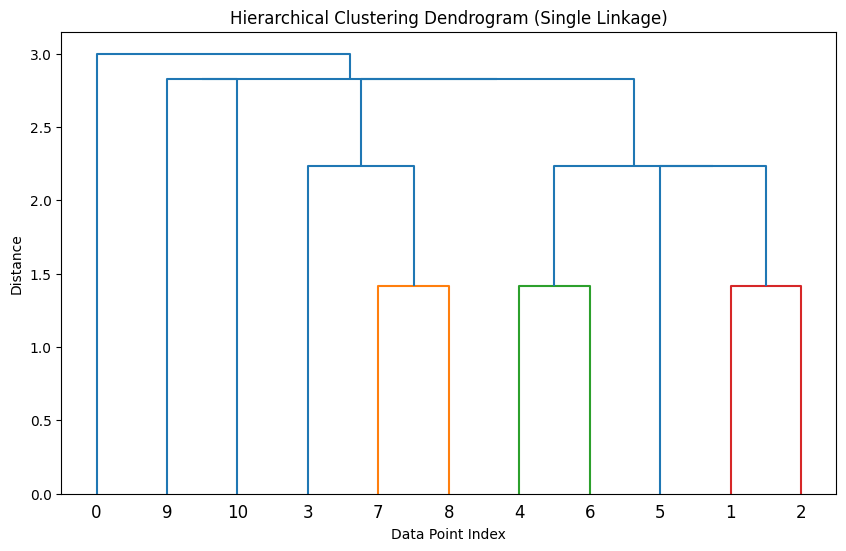

In [13]:
# Plot dendrogram
fig, ax = plt.subplots(figsize=(10, 6))
dendrogram(linkages, ax=ax, labels=df.index.to_list(), orientation='top')
ax.set_title('Hierarchical Clustering Dendrogram (Single Linkage)')
ax.set_xlabel('Data Point Index')
ax.set_ylabel('Distance')
plt.show()